In [14]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


Import the CSV Data as Pandas DataFrame

In [15]:
df = pd.read_csv('data\stud.csv')

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
#Preparing X and Y Variables
X=df.drop(columns=['math_score'],axis=1)

In [18]:
y = df['math_score']

In [19]:
#Create Column Tranformer with 3types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncode",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [20]:
X = preprocessor.fit_transform(X)
from sklearn.model_selection import train_test_split

In [21]:
#Seperate dataset into train and test
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape
from sklearn.metrics import mean_absolute_error

In [22]:
### Create an Evalute Function to give all metrics after model Training
def evalute_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2_square = r2_score(actual,predicted)
    return mae,rmse,r2_square
    
    
    

In [28]:
models = {
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_lst=[]
r2_list=[]
for i,(model_name,model) in enumerate(models.items()):
    model = list(models.values())[i]
    model.fit(X_train,y_train) #Train Model
    
    y_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evalute_model(y_train,y_predict)
    model_test_mae,model_test_rmse,model_test_r2 = evalute_model(y_test,y_test_predict)
    
    
    print(list(models.keys())[i])
    model_lst.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    
    print('Model perfromance for Test Set')
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("Mean absolute Error: {:.4f}".format(model_test_mae))
    print("R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("----------------------------------------------")



    
    
    

LR
Model performance for Training set
-Root Mean Squared Error: 5.2466
-Mean absolute Error: 4.1954
- R2 Score: 0.8811
Model perfromance for Test Set
Root Mean Squared Error: 5.7686
Mean absolute Error: 4.5177
R2 Score: 0.8502
----------------------------------------------
Lasso
Model performance for Training set
-Root Mean Squared Error: 6.4732
-Mean absolute Error: 5.0840
- R2 Score: 0.8190
Model perfromance for Test Set
Root Mean Squared Error: 6.9366
Mean absolute Error: 5.5796
R2 Score: 0.7834
----------------------------------------------
Ridge
Model performance for Training set
-Root Mean Squared Error: 5.2362
-Mean absolute Error: 4.1929
- R2 Score: 0.8816
Model perfromance for Test Set
Root Mean Squared Error: 5.7124
Mean absolute Error: 4.4630
R2 Score: 0.8531
----------------------------------------------
K-Neighbors Regressor
Model performance for Training set
-Root Mean Squared Error: 5.6974
-Mean absolute Error: 4.5568
- R2 Score: 0.8598
Model perfromance for Test Set
Roo

In [39]:
pd.DataFrame(list(zip(model_lst,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.853140
0,LR,0.850240
7,CatBoosting Regressor,0.830806
5,Random Forest Regressor,0.813897
6,XGBRegressor,0.813056
8,AdaBoost Regressor,0.794099
1,Lasso,0.783450
3,K-Neighbors Regressor,0.733078
4,Decision Tree,0.700908


## Linear Regression

In [42]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f "%score)

Accuracy of the model is 85.02 


### Plot y_pred and y_test


Text(0, 0.5, 'Predicted')

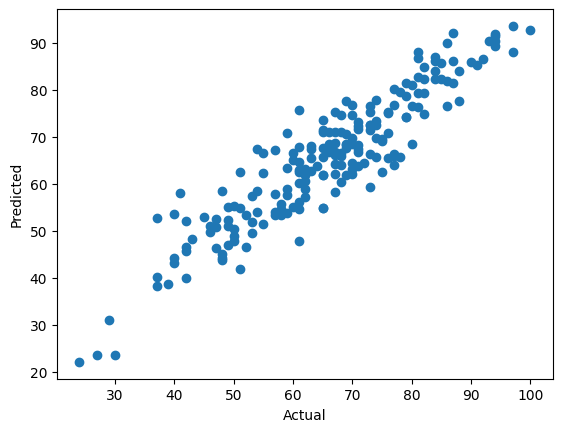

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')